In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

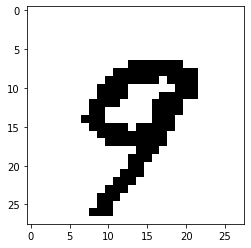

In [2]:
# Read grayscale image
img = cv2.imread('digit.png', cv2.IMREAD_GRAYSCALE)

# Convert to binary with thresholding
_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray_r') # gray_r colormap shows 1 as black

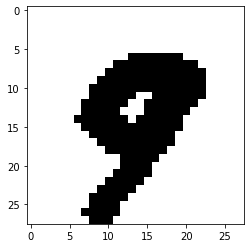

In [3]:
# Create morphological kernel
kern = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])
kern = kern.astype(np.uint8)

# Perform dilation
dilated_img = cv2.dilate(img, kern)
plt.imshow(dilated_img, cmap='gray_r') # gray_r colormap shows 1 as black

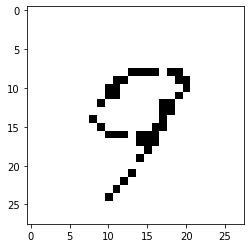

In [4]:
# Erosion
eroded_img = cv2.erode(img, kern)
plt.imshow(eroded_img, cmap='gray_r') # gray_r colormap shows 1 as black

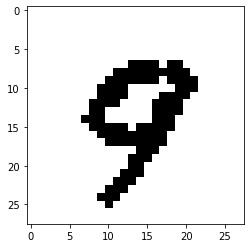

In [5]:
# Opening
opened_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kern)
plt.imshow(opened_img, cmap='gray_r') # gray_r colormap shows 1 as black

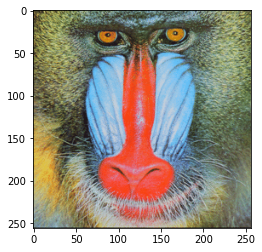

In [6]:
# Read colored image
img = cv2.imread('baboon.png')

# Convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [7]:
# Convert from rgb to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Convert to float and scale from 0 to 1
img_gray = img_gray.astype(np.float)/255

In [8]:
sigma = 2
n = int(2*np.ceil(3*sigma)+1)
gauss1D = cv2.getGaussianKernel(n, sigma) # Column vector
gauss2D = gauss1D @ gauss1D.T # Symmetric gaussian kernel
img_smooth = cv2.filter2D(img_gray, -1, gauss2D)

In [9]:
sigma = 4
n = int(2*np.ceil(3*sigma)+1)
gauss1D = cv2.getGaussianKernel(n, sigma) # Column vector
gauss2D = gauss1D @ gauss1D.T # Symmetric gaussian kernel
img_smooth_2 = cv2.filter2D(img_gray, -1, gauss2D)

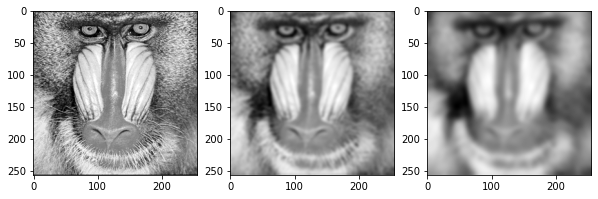

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (10,40))
ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(img_smooth, cmap='gray')
ax[2].imshow(img_smooth_2, cmap='gray')